<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0]) 


In [3]:
# beta = A^-1 * b
beta = np.linalg.inv(A).dot(b)
beta

array([ 1., -1.])

In [4]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [5]:
np.linalg.solve(A,b)

array([ 1., -1.])

#### y = b0 + b1x
#### y = 1 - x

In [6]:
beta[0], beta[1]

(1.0, -1.0)

$$ y=1 + -x $$

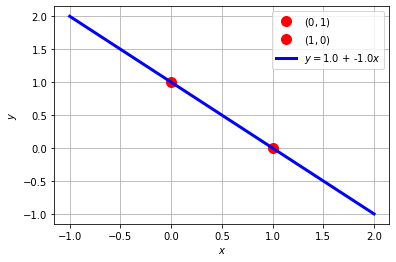

In [7]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(0,1,'ro',ms=10,label='$(0,1)$')
plt.plot(1,0,'ro',ms=10,label='$(1,0)$')
x_num = np.linspace(-1,2)
y_num = beta[0] + beta[1]*x_num # y=b0 + b1x

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [8]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
             [1,0,0],
             [1,1,1]])
b = np.array([1,0,1])

In [9]:
beta = np.linalg.inv(A).dot(b)
beta

array([0., 0., 1.])

In [10]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [11]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
beta = np.linalg.solve(A,b)
beta

array([0., 0., 1.])

$y = x^2 $

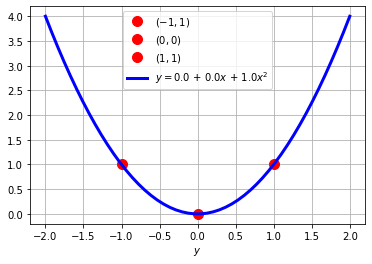

In [12]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(-1,1,'ro',ms=10,label='$(-1,1)$')
plt.plot(0,0,'ro',ms=10,label='$(0,0)$')
plt.plot(1,1,'ro',ms=10,label='$(1,1)$')

x_num = np.linspace(-2,2)
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2

plt.plot(x_num,y_num, 'b',lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$ + {np.round(beta[2],2)}$x^2$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [13]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2,size=(N,))


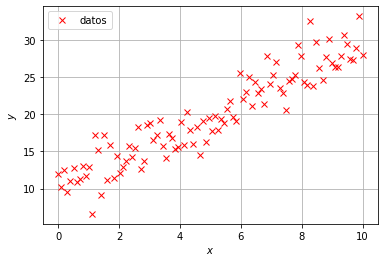

In [14]:
# Graficar
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes ${\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los ${\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza

$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]{\beta})^2=\frac{1}{2n}\left|\left|{y}-{X}{\beta}\right|\right|^2,$$

donde ${y}=\left[y_1\quad\dots\quad y_n\right]^T$, y ${X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$${\beta}^{ls} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [15]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [16]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [17]:
# Definir funcion objetivo y punto inicial (xi_points,yi_points), n_points
def min_sqe(beta,x_points,y_points):
    n = len(x_points)
    #función objetivo (función de costo) error cuadrático medio
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [18]:
beta_ini = [0,0]

In [19]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [20]:
y

array([11.94771813, 10.20982698, 12.52275744,  9.52715778, 11.03771022,
       12.72324197, 10.91277478, 11.33200898, 13.03577327, 11.66989915,
       12.96652313,  6.58014372, 17.18873028, 15.26309789,  9.10973689,
       17.22838693, 11.16870529, 15.86105085, 11.48461165, 14.44611066,
       12.1378469 , 12.84237923, 13.65731166, 15.74998793, 14.27529488,
       15.45197304, 18.25823921, 12.58057099, 13.71622612, 18.57256742,
       18.88828406, 16.52907438, 17.22698222, 19.24359168, 15.74047217,
       14.09537897, 17.29122067, 16.84710866, 15.28972176, 15.62067135,
       18.94569416, 15.91865727, 20.31869434, 17.89525004, 16.00164268,
       18.36187011, 14.50747159, 19.16893384, 16.21519643, 19.56106298,
       17.79262693, 19.7289209 , 17.83339896, 19.44193205, 18.86536612,
       20.78409517, 21.79442334, 19.63351136, 19.11730558, 25.60046027,
       22.13543058, 23.04445079, 25.06376868, 21.10473094, 24.32133985,
       22.90113501, 23.4796655 , 21.45823749, 27.82786164, 24.04

In [21]:
solucion = opt.minimize(fun=min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 2.403266622967706
 hess_inv: array([[ 3.91352747, -0.58401976],
       [-0.58401976,  0.11700295]])
      jac: array([ 1.10268593e-06, -2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([10.01931047,  1.95682001])

In [22]:
beta = solucion.x
beta

array([10.01931047,  1.95682001])

$$\hat{f(x)}=9.59 + 2.05*x$$

¿Qué tan bien luce el ajuste?

In [23]:
# Coeficientes \beta_0 y \beta_1
beta

array([10.01931047,  1.95682001])

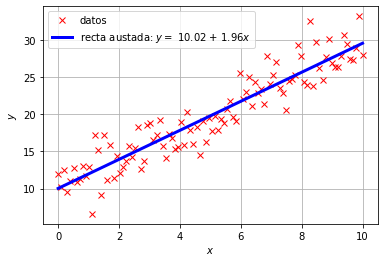

In [24]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat = beta[0] + beta[1]*x

plt.plot(x,f_hat,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [25]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x=np.linspace(0,1,N)
y=np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3, size=(N,))


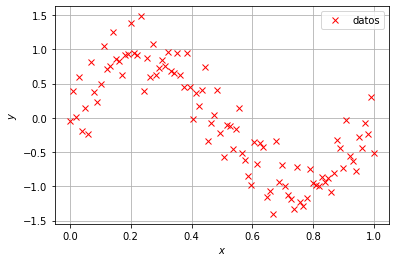

In [26]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [27]:
# Definir funcion objetivo y semilla
# Definir funcion objetivo y punto inicial (xi_points,yi_points), n_points
def min_sqe_1(beta,x_points,y_points):
    n = len(x_points)
    #función objetivo (función de costo) error cuadrático medio
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe
beta_ini_1 =[0,0]

In [28]:
# Resolver
sol1 = opt.minimize(fun=min_sqe_1, x0=beta_ini_1, args=(x,y))
sol1

      fun: 0.1302190355857991
 hess_inv: array([[ 3.90331794, -5.85980952],
       [-5.85980952, 11.75013784]])
      jac: array([6.89178705e-07, 2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 0.87661805, -1.86085188])

**Veamos $\beta$ para el ajuste con recta**

In [29]:
beta_1 = sol1.x
beta_1

array([ 0.87661805, -1.86085188])

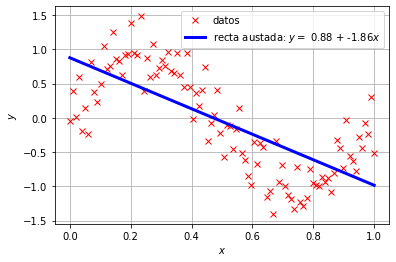

In [30]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat_1 = beta_1[0] + beta_1[1]*x

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [31]:
# Definir funcion objetivo y semilla
def min_sqe_2(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [32]:
beta_ini_2 = [0,0,0]

In [33]:
# Resolver
sol2 = opt.minimize(fun=min_sqe_2, x0=beta_ini_2, args=(x,y))
sol2

      fun: 0.12989115307300872
 hess_inv: array([[   8.57168094,  -34.18504794,   28.46603963],
       [ -34.18504794,  182.64193958, -171.52000689],
       [  28.46603963, -171.52000689,  171.80665671]])
      jac: array([-7.94604421e-06, -5.04218042e-06, -3.52226198e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 17
     njev: 18
   status: 0
  success: True
        x: array([ 0.93218993, -2.19771341,  0.3368495 ])

**Veamos $\beta$ para el ajuste con parábola**

In [34]:
# Mostrar coeficientes
beta_2 = sol2.x
beta_2

array([ 0.93218993, -2.19771341,  0.3368495 ])

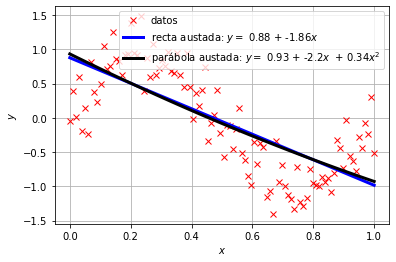

In [35]:
# Graficar recta y parabola ajustadas

plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [36]:
# Definir funcion objetivo y semilla
def min_sqe_3(beta,x_points,y_points):
    n=len(x_points)
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [37]:
beta_ini_3 = [0,0,0,0]

In [38]:
sol3 = opt.minimize(fun=min_sqe_3, x0=beta_ini_3, args=(x,y))
sol3

      fun: 0.04007890873670768
 hess_inv: array([[   14.3412557 ,  -108.05241871,   215.9518932 ,  -125.66789566],
       [ -108.05241871,  1107.14963016, -2508.58007238,  1564.02519334],
       [  215.9518932 , -2508.58007238,  6067.07649868, -3938.92575325],
       [ -125.66789566,  1564.02519334, -3938.92575325,  2628.42396624]])
      jac: array([5.16418368e-07, 7.91624188e-08, 9.63918865e-08, 1.13155693e-07])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.12382093,  10.80216039, -32.32663738,  21.77564565])

**Veamos $\beta$ para el ajuste con cúbica**

In [39]:
# Mostrar coeficientes
beta_3 = sol3.x
beta_3

array([ -0.12382093,  10.80216039, -32.32663738,  21.77564565])

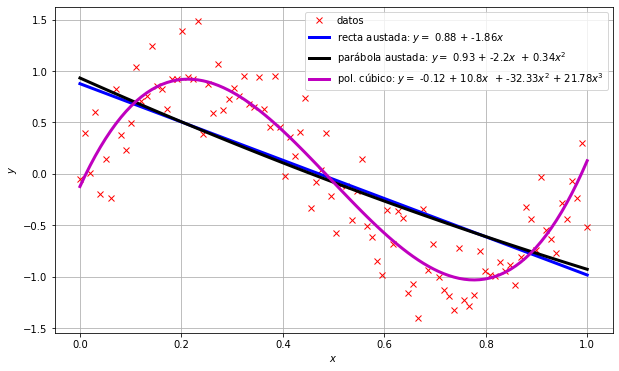

In [40]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [41]:
# Definimos funcion objetivo y semilla
def min_sqe_7(beta,x_points,y_points):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(8)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points-f_hat)**2).sum()
    return sqe
beta_ini_7 = np.zeros(8)

In [42]:
# Resolvemos
sol7 = opt.minimize(fun=min_sqe_7, x0=beta_ini_7, args=(x,y))
sol7

      fun: 0.03821695584038757
 hess_inv: array([[   14.73624159,  -117.27288167,   210.53516163,    12.73448413,
         -118.41873001,  -114.7778088 ,   -16.68489564,   132.66208479],
       [ -117.27288167,  1313.5271121 , -2766.65396868,   -16.45938085,
         1711.82589879,  1579.78751238,   166.10952564, -1933.07238743],
       [  210.53516163, -2766.65396868,  6425.88531602,  -227.86550213,
        -4257.23490857, -3795.04490692,  -272.97778847,  4869.09114472],
       [   12.73448413,   -16.45938085,  -227.86550213,   144.20477818,
          294.74203774,   195.86863295,   -57.07160088,  -383.33293168],
       [ -118.41873001,  1711.82589879, -4257.23490857,   294.74203774,
         2974.90028755,  2579.89609098,   109.86584733, -3450.51302136],
       [ -114.7778088 ,  1579.78751238, -3795.04490692,   195.86863295,
         2579.89609098,  2270.95038837,   132.2358475 , -2969.43797967],
       [  -16.68489564,   166.10952564,  -272.97778847,   -57.07160088,
          109.86

**De nuevo, veamos $\beta$**

In [43]:
# Mostrar coeficientes
beta_7 = sol7.x
beta_7

array([ -0.09656725,   9.38233334, -21.37629023,  -2.57235206,
        10.46299641,  11.11682673,   2.98005492, -10.00390488])

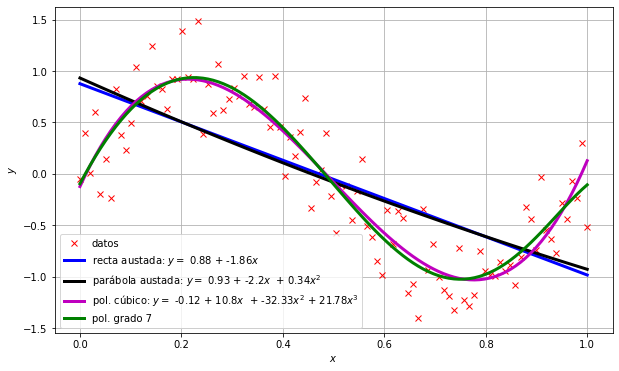

In [44]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)


plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x,f_hat_7,'g',lw=3,label=f'pol. grado 7')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

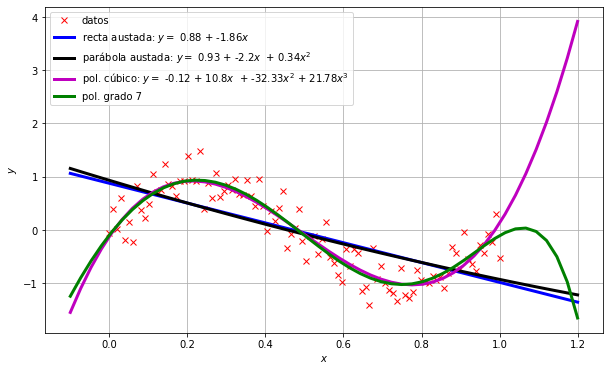

In [54]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.2)

f_hat_1 = beta_1[0] + beta_1[1]*x_num
f_hat_2 = beta_2[0] + beta_2[1]*x_num + beta_2[2]*x_num**2
f_hat_3 = beta_3[0] + beta_3[1]*x_num + beta_3[2]*x_num**2 + beta_3[3]*x_num**3
f_hat_7 = np.array([beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x_num,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x_num,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x_num,f_hat_7,'g',lw=3,label=f'pol. grado 7')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [55]:
# Mostrar coeficientes
beta_7

array([ -0.09656725,   9.38233334, -21.37629023,  -2.57235206,
        10.46299641,  11.11682673,   2.98005492, -10.00390488])

In [46]:
# Grafica de ajustes
# Grafica de los puntos y la recta ajustada



In [58]:
def min_sq_N(beta,x_points,y_points,N):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe=(1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [59]:
# Polinomio de grado 8
# Resolvemos
beta_ini_8 = np.zeros(9)
sol8 = opt.minimize(fun=min_sq_N, x0=beta_ini_8, args=(x,y,8))
sol8

      fun: 0.038145101488652966
 hess_inv: array([[   13.7778495 ,  -101.20278899,   156.75430375,    37.10989604,
          -65.04969155,   -90.42556033,   -56.74208391,    11.81713327,
           97.47315366],
       [ -101.20278899,  1041.32716641, -1903.62365618,  -352.20768426,
          897.75842979,  1167.02147595,   698.30767205,  -199.81509234,
        -1304.05095217],
       [  156.75430375, -1903.62365618,  3871.87869606,   558.14537912,
        -2006.74738173, -2490.74611487, -1432.11486049,   514.45560271,
         2880.2553979 ],
       [   37.10989604,  -352.20768426,   558.14537912,   153.75289306,
         -205.313962  ,  -305.27969855,  -203.9742456 ,    17.49541915,
          298.89989619],
       [  -65.04969155,   897.75842979, -2006.74738173,  -205.313962  ,
         1139.15696969,  1353.93149489,   745.24051046,  -333.00073107,
        -1629.20993139],
       [  -90.42556033,  1167.02147595, -2490.74611487,  -305.27969855,
         1353.93149489,  1643.93269241, 

In [60]:
beta_8 = sol8.x
beta_8

array([ -0.05217445,   8.47401574, -17.88043013,  -4.67296958,
         6.60982309,   9.76270679,   6.65032573,  -0.1849139 ,
        -8.87095325])

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [62]:
# Error cuadratico
error = []
for i in range(1,10):
    beta_ini = np.zeros(i+1)
    solucion = opt.minimize(fun=min_sq_N, x0=beta_ini, args=(x,y,i))
    error.append(solucion.fun)


In [63]:
error

[0.1302190355857991,
 0.12989115307300872,
 0.04007890873670768,
 0.039829549723988146,
 0.038187592865127046,
 0.03816679775463138,
 0.03821695584038757,
 0.038145101488652966,
 0.03811536097707891]

Text(0, 0.5, 'error cuadrático medio')

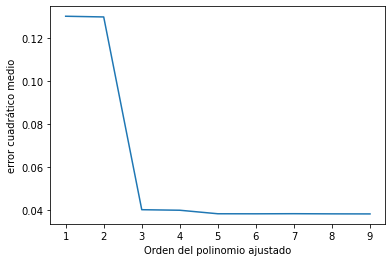

In [64]:
#Plotear la lista de los errores de los ajustes de curvas
plt.figure(figsize=(6,4))
plt.plot(range(1,10),error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('error cuadrático medio')

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$${\beta}^{ls} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos ${\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes ${\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$${\beta}^{ridge} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2 + \lambda\left|\left|{\beta}\right|\right|^2$$

In [65]:
def min_sq_N_Ridge(beta,x_points,y_points,N,l):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe_ridge=(1/(2*n))*((y_points - f_hat)**2).sum() + l*np.linalg.norm(beta)**2
    return sqe_ridge

In [66]:
beta_ridge_ini_7 = np.zeros(8)
beta_ridge_ini_7 

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
sol = opt.minimize(fun=min_sq_N_Ridge, x0=beta_ridge_ini_7, args=(x,y,7,0.0003))
sol

      fun: 0.07180549964014708
 hess_inv: array([[   7.97154904,  -33.86855134,   23.87985244,   16.34977955,
           2.07982878,   -5.92714452,   -7.41855974,   -4.3963555 ],
       [ -33.86855134,  235.94195442, -275.42018046, -103.90122427,
          61.96080366,  109.0577749 ,   61.11839307,  -44.0406842 ],
       [  23.87985244, -275.42018046,  536.23308933,   43.08203815,
        -288.47940657, -288.82951737,  -56.03718268,  303.98715055],
       [  16.34977955, -103.90122427,   43.08203815,  100.06981301,
          78.50907121,   20.24691578,  -51.40612168, -124.01671033],
       [   2.07982878,   61.96080366, -288.47940657,   78.50907121,
         264.78238011,  202.00636181,  -19.69216373, -321.91117098],
       [  -5.92714452,  109.0577749 , -288.82951737,   20.24691578,
         202.00636181,  177.15256442,   10.13790036, -229.49825141],
       [  -7.41855974,   61.11839307,  -56.03718268,  -51.40612168,
         -19.69216373,   10.13790036,   33.22152087,   46.91522746],

In [79]:
beta_ridge_7 = sol.x
beta_ridge_7

array([ 0.57126982,  1.41807935, -4.2772352 , -2.45865879, -0.10152794,
        1.34071899,  1.89219542,  1.8230579 ])

In [80]:
beta_7

array([ -0.09656725,   9.38233334, -21.37629023,  -2.57235206,
        10.46299641,  11.11682673,   2.98005492, -10.00390488])

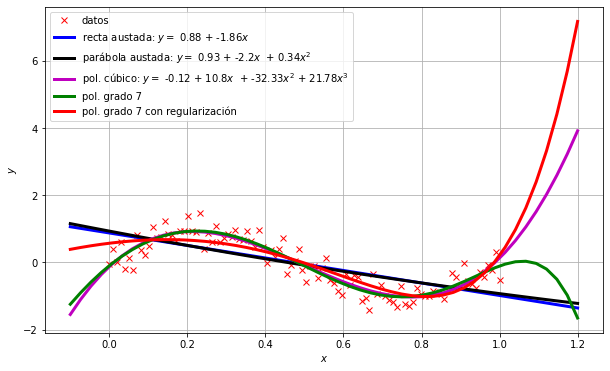

In [81]:
# Grafica de los puntos y la recta ajustada
# Mostrar coeficientes
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.2)

f_hat_1 = beta_1[0] + beta_1[1]*x_num
f_hat_2 = beta_2[0] + beta_2[1]*x_num + beta_2[2]*x_num**2
f_hat_3 = beta_3[0] + beta_3[1]*x_num + beta_3[2]*x_num**2 + beta_3[3]*x_num**3
# sin aplicar regularización
f_hat_7 = np.array([beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)
# aplicando regularización (Ridge)
f_hat_7_ridge = np.array([beta_ridge_7[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x_num,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x_num,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x_num,f_hat_7,'g',lw=3,label=f'pol. grado 7')         
plt.plot(x_num,f_hat_7_ridge,'r',lw=3,label=f'pol. grado 7 con regularización')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 3.2. Lasso

$${\beta}^{lasso} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2 + \lambda\left|\left|{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [82]:
def min_sq_N_Lasso(beta,x_points,y_points,N,l):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe_lasso=(1/(2*n))*((y_points - f_hat)**2).sum() + l*np.abs(beta).sum()
    return sqe_lasso

In [83]:
beta_ini_7_lasso = np.zeros(8)

In [84]:
sol = opt.minimize(fun=min_sq_N_Lasso, x0=beta_ini_7_lasso, args=(x,y,7,0.0003))
sol

      fun: 0.05304548400626106
 hess_inv: array([[ 1.44865709e+01, -1.21426832e+02,  2.39127100e+02,
         5.61928961e-01, -2.22423446e+02,  2.53583412e+00,
        -1.25654368e-03,  9.03172778e+01],
       [-1.21426832e+02,  1.33746302e+03, -2.86089397e+03,
        -1.11415139e+01,  2.76796211e+03,  2.93483319e+01,
         2.03809111e-02, -1.18822102e+03],
       [ 2.39127100e+02, -2.86089397e+03,  6.37247467e+03,
         3.12732922e+01, -6.39539533e+03, -1.50573037e+02,
        -5.31903798e-02,  2.89150220e+03],
       [ 5.61928961e-01, -1.11415139e+01,  3.12732922e+01,
         5.19277161e-01, -3.70788013e+01, -5.80987742e+00,
        -7.79910297e-04,  2.26768309e+01],
       [-2.22423446e+02,  2.76796211e+03, -6.39539533e+03,
        -3.70788013e+01,  6.79685540e+03,  2.18856637e+02,
         5.90041774e-02, -3.31020386e+03],
       [ 2.53583412e+00,  2.93483319e+01, -1.50573037e+02,
        -5.80987742e+00,  2.18856637e+02,  7.92578091e+01,
         8.80707276e-03, -1.8081858

In [86]:
beta_7_lasso=sol.x
beta_7_lasso

array([ 8.86753272e-02,  7.22000122e+00, -1.78028431e+01, -4.58038464e-02,
        1.14261721e+01, -1.29009577e-10,  4.30373913e-05, -7.52011889e-01])

In [89]:
beta_ridge_7

array([ 0.57126982,  1.41807935, -4.2772352 , -2.45865879, -0.10152794,
        1.34071899,  1.89219542,  1.8230579 ])

In [90]:
beta_7

array([ -0.09656725,   9.38233334, -21.37629023,  -2.57235206,
        10.46299641,  11.11682673,   2.98005492, -10.00390488])

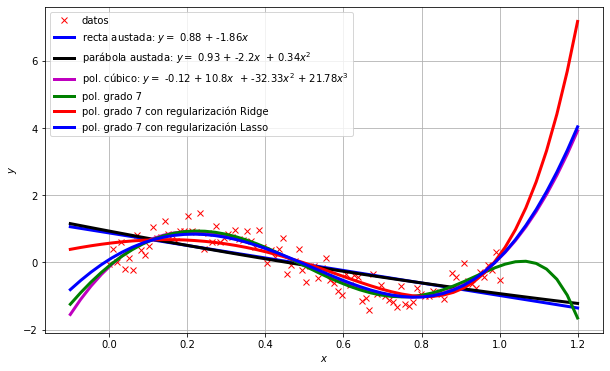

In [91]:
# Graficar los modelos obtenidos de grado 7 (con regularización: lasso, ridge)
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.2)

f_hat_1 = beta_1[0] + beta_1[1]*x_num
f_hat_2 = beta_2[0] + beta_2[1]*x_num + beta_2[2]*x_num**2
f_hat_3 = beta_3[0] + beta_3[1]*x_num + beta_3[2]*x_num**2 + beta_3[3]*x_num**3
# sin aplicar regularización
f_hat_7 = np.array([beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)
# aplicando regularización (Ridge)
f_hat_7_ridge = np.array([beta_ridge_7[i]*x_num**i for i in range(8)]).sum(axis=0)
# aplicando regularización (Lasso)
f_hat_7_lasso = np.array([beta_7_lasso[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x_num,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x_num,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x_num,f_hat_7,'g',lw=3,label=f'pol. grado 7')         
plt.plot(x_num,f_hat_7_ridge,'r',lw=3,label=f'pol. grado 7 con regularización Ridge')         
plt.plot(x_num,f_hat_7_lasso,'b',lw=3,label=f'pol. grado 7 con regularización Lasso')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()



## 4. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?


In [92]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [93]:
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Tendrán que mandarme un mensaje con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: por definir

# 6 Marzo 2023 Examen modulo 1